In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cross-entropy loss function : Loss likelihood
def cross_entropy_loss(y, y_pred):
    # p = np.clip(p, 1e-15, 1 - 1e-15)  # Avoid log(0)
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

In [63]:
# gradient of a loss
def compute_gradient(x,y,y_pred):
  n = y.shape[0]
  return np.dot(x.T,(y_pred - y))/n


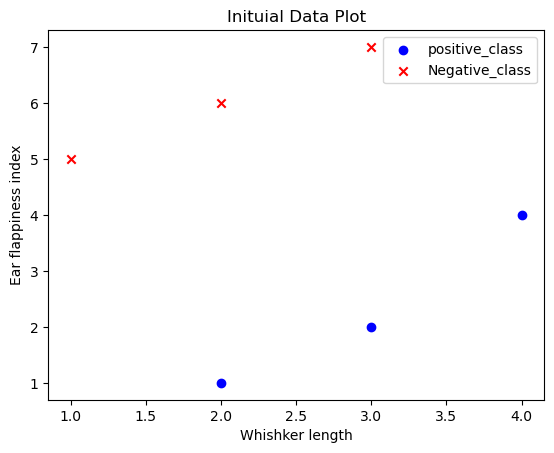

In [64]:
# Dataset 
x = np.array([
    [2,1],
    [3,2],
    [4,4], #positive examples
    [1,5],
    [2,6],
    [3,7]  # negative examples
])

y = np.array([1,1,1,0,0,0])  # labels

# plot initial data
plt.scatter(x[:3,0], x[:3,1] , color = 'blue' , marker= 'o' , label = 'positive_class')
plt.scatter(x[3:,0], x[3:,1] , color = 'red' , marker= 'x' , label = 'Negative_class')
plt.xlabel('Whishker length')
plt.ylabel('Ear flappiness index')
plt.legend()
plt.title('Inituial Data Plot')
plt.show()

In [65]:
# logestic regression model

def logistic_regression(x,y ,learning_rate = 0.01, num_iteration = 100):
    # Add intercept term to x  (augumented 1 to it)
    x = np.hstack((np.ones((x.shape[0],1)),x))
    print(x)
    # Initialize the weights
    weights = np.zeros(x.shape[1])
    
    # gradient decscent
    # Train the model
    for i in range(num_iteration):
        # Forward pass
        z = np.dot(x,weights)
        y_pred = sigmoid(z)
        # Backward pass
        loss = cross_entropy_loss(y,y_pred)
        gradient = compute_gradient(x,y, y_pred)
        # Weight update
        weights = weights - learning_rate * gradient
        if i%10 ==0:
          plot_decision_boundary(x,y, weights, loss, i)
          print(f'Iteration{i}: Theta={weights}, loss = {loss}')
    return weights
    

In [66]:
# plotting  function for decision boundary

def plot_decision_boundary(x,y,weights,loss, iteration):
    # Plotting the decision boundary
    
    plt.scatter(x[:3,1], x[:3,2] , color = 'blue' , marker= 'o' , label = 'positive_class' if iteration == 0 else "")
    plt.scatter(x[3:,1], x[3:,2] , color = 'red' , marker= 'x' , label = 'Negative_class' if iteration == 0 else "")
    
    # extend the x values a bit beyond the minimum and maximum values of the dataset
    
    x_values = np.array([np.min(x[:,1])-1, np.max(x[:,1]) + 1])
    y_values = -(weights[0] + weights[1]*x_values) / weights[2]
    plt.plot(x_values, y_values , "k")
    
    plt.xlim(x_values[0],x_values[1])
    plt.ylim(np.min(x[:,2])-1, np.max(x[:,2])+1)
    plt.xlabel('whisker length')
    plt.ylabel('Ear flappiness index')
    plt.title(f'Decision Boundary at iteration {iteration}\nLoss: {loss}')
    if iteration ==0:
        plt.legend()
    plt.grid()    
    plt.show()


[[1. 2. 1.]
 [1. 3. 2.]
 [1. 4. 4.]
 [1. 1. 5.]
 [1. 2. 6.]
 [1. 3. 7.]]


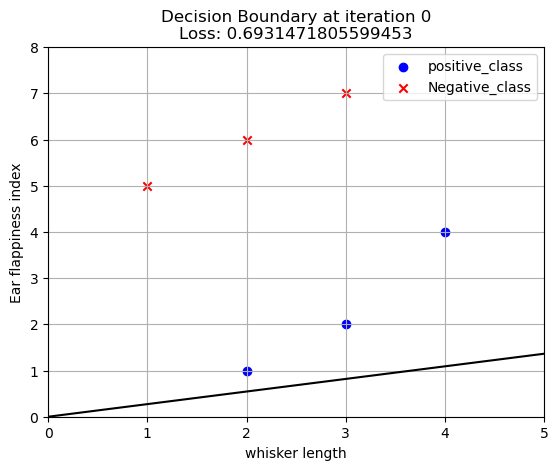

Iteration0: Theta=[ 0.          0.0025     -0.00916667], loss = 0.6931471805599453


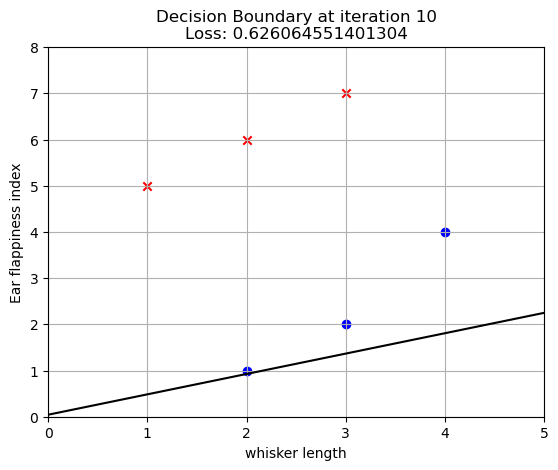

Iteration10: Theta=[ 0.00351898  0.03583314 -0.08124515], loss = 0.626064551401304


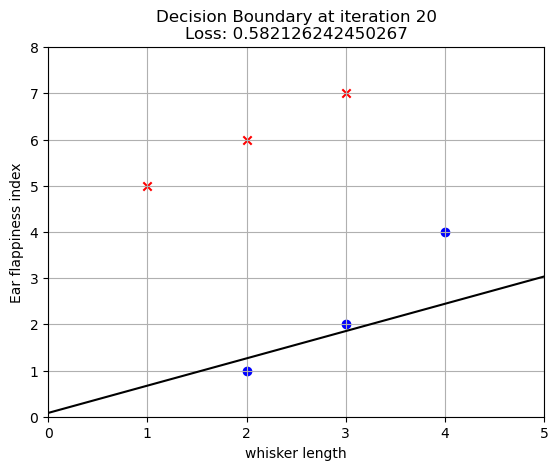

Iteration20: Theta=[ 0.0107534   0.07750049 -0.13121449], loss = 0.582126242450267


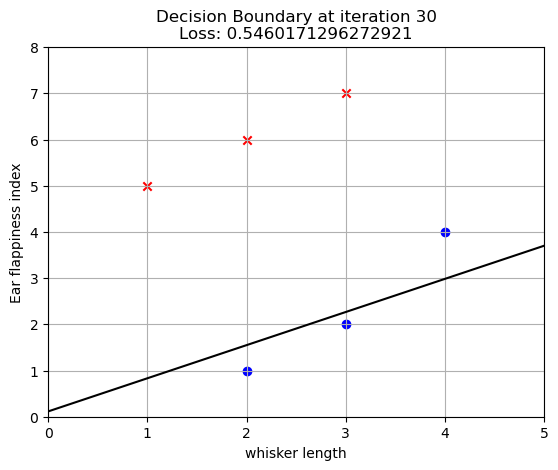

Iteration30: Theta=[ 0.01952555  0.12200009 -0.17007813], loss = 0.5460171296272921


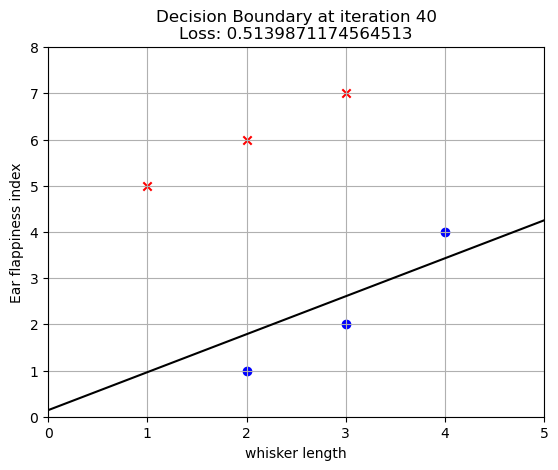

Iteration40: Theta=[ 0.02882972  0.16681759 -0.20296236], loss = 0.5139871174564513


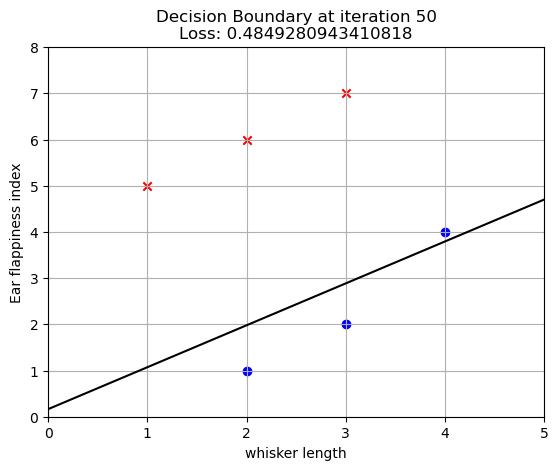

Iteration50: Theta=[ 0.03819345  0.21079708 -0.23234289], loss = 0.4849280943410818


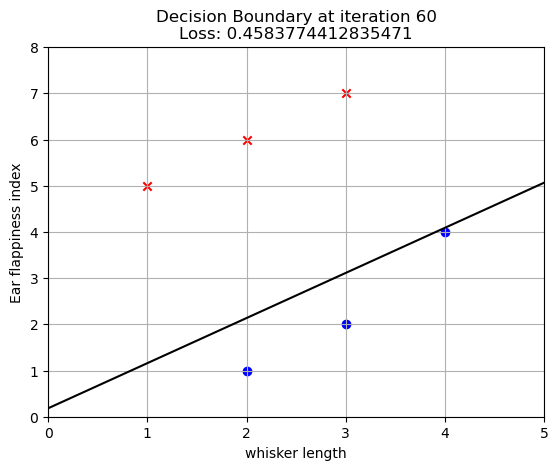

Iteration60: Theta=[ 0.04739475  0.25342232 -0.25946218], loss = 0.4583774412835471


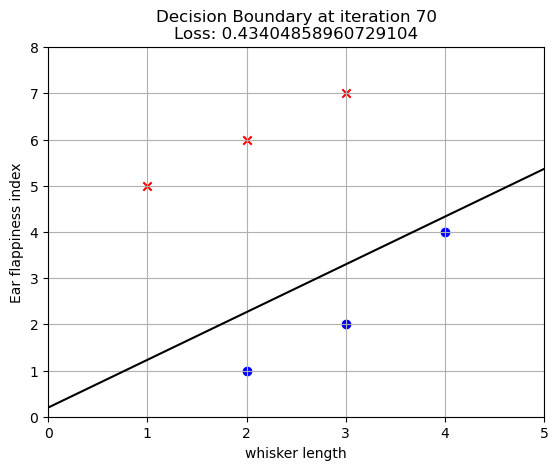

Iteration70: Theta=[ 0.05633317  0.29448797 -0.28496725], loss = 0.43404858960729104


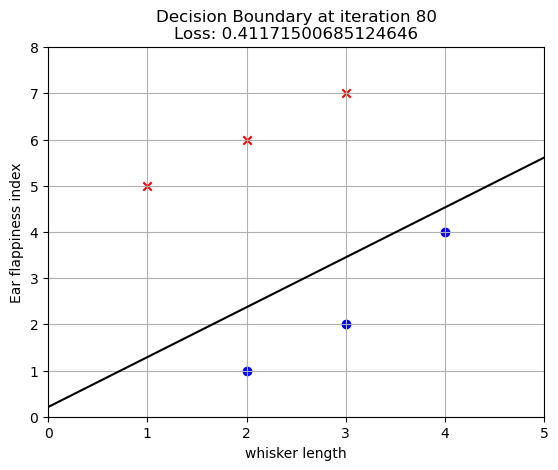

Iteration80: Theta=[ 0.0649683   0.33394185 -0.30920989], loss = 0.41171500685124646


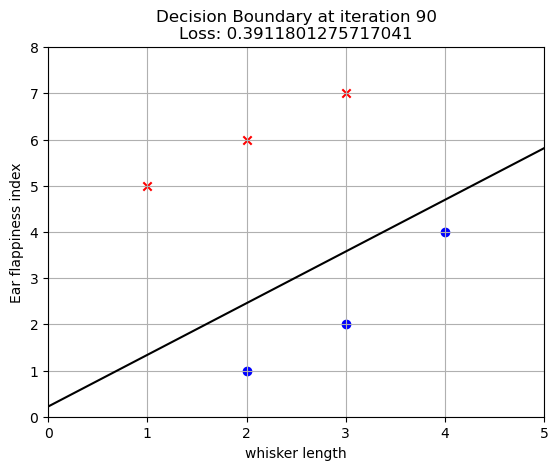

Iteration90: Theta=[ 0.07328952  0.37180678 -0.33239254], loss = 0.3911801275717041


In [67]:
# training the model 
weights = logistic_regression(x,y)